In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# LOAD LAB DATA FOR PROCESSING

## AMBIENT VIBRATION

In [2]:
# Absolute path for ambient vibration data
folder_path_av = r'../DATA/LAB_RES/NOISE'

# Create an empty numpy array to store all the ambient vibration data
data_array_av = np.zeros((300, 6001))

# Read each CSV file for ambient vibration data
for i in range(300):
    file_path_av = os.path.join(folder_path_av, f'Node_Data_{i+1}.csv')
    # Read the first column of the CSV file (assuming you need the first column data, adjust .iloc[:, 0] for other columns)
    df_av = pd.read_csv(file_path_av, header=None)
    
    # Store the first column data from each file into the array for ambient vibration
    data_array_av[i, :] = df_av.iloc[:, 0].values  # Adjust the column index to read different columns

# Ambient vibration data has been loaded into data_array_av
print(data_array_av.shape)  # Output should be (300, 6001)


(300, 6001)


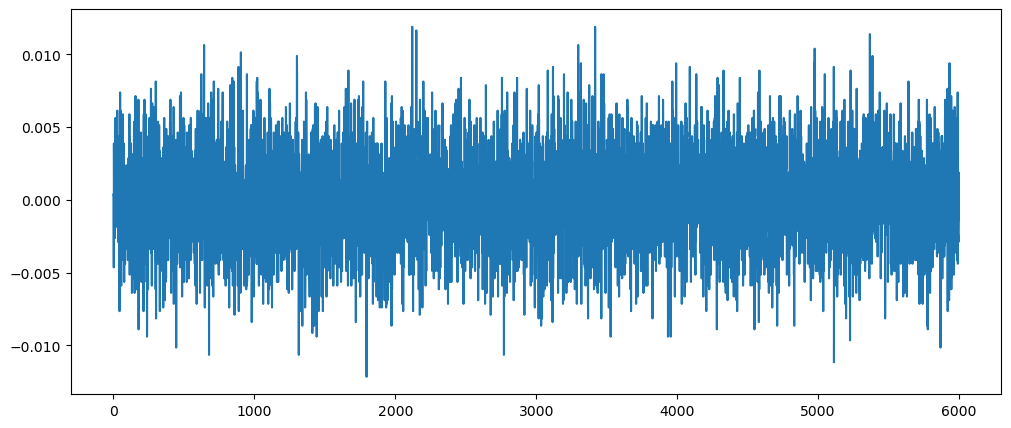

In [3]:
# remove the offset from the data
data_array_av = data_array_av - np.mean(data_array_av, axis=1, keepdims=True)

# plot the first record
plt.figure(figsize=(12, 5))
plt.plot(data_array_av[0, :])
plt.show()

## IMPACT

In [4]:
# Absolute path for impact data
folder_path_ip = r'../DATA/LAB_RES/IMPACT'

# Create an empty numpy array to store all the impact data
data_array_ip = np.zeros((100, 6001))

# Read each CSV file for impact data
for i in range(100):
    file_path_ip = os.path.join(folder_path_ip, f'Node_Data_{i+1}.csv')
    # Read the first column of the CSV file (assuming you need the first column data, adjust .iloc[:, 0] for other columns)
    df_ip = pd.read_csv(file_path_ip, header=None)
    
    # Store the first column data from each file into the array for impact data
    data_array_ip[i, :] = df_ip.iloc[:, 0].values  # Adjust the column index to read different columns

# Impact data has been loaded into data_array_ip
print(data_array_ip.shape)  # Output should be (100, 6001)

(100, 6001)


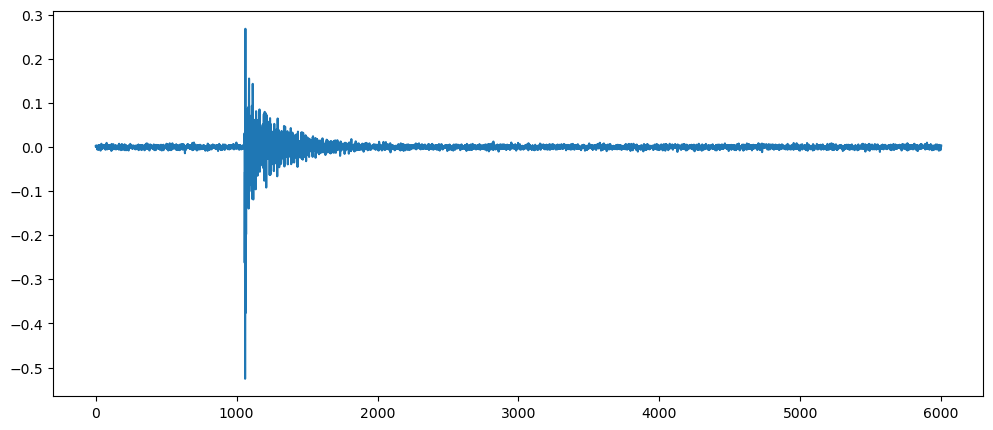

In [5]:
# remove the offset from the data
data_array_ip = data_array_ip - np.mean(data_array_ip, axis=1, keepdims=True)

# plot the first record
plt.figure(figsize=(12, 5))
plt.plot(data_array_ip[0, :])
plt.show()

## STRONG WIND

In [6]:
# Absolute path for wind data
folder_path_sw = r'../DATA/LAB_RES/WIND'

# Create an empty numpy array to store all the wind data
data_array_sw = np.zeros((100, 6001))

# Read each CSV file for wind data
for i in range(100):
    file_path_sw = os.path.join(folder_path_sw, f'Node_Data_{i+1}.csv')
    # Read the first column of the CSV file (assuming you need the first column data, adjust .iloc[:, 0] for other columns)
    df_sw = pd.read_csv(file_path_sw, header=None)
    
    # Store the first column data from each file into the array for wind data
    data_array_sw[i, :] = df_sw.iloc[:, 0].values  # Adjust the column index to read different columns

# Wind data has been loaded into data_array_sw
print(data_array_sw.shape)  # Output should be (100, 6001)

(100, 6001)


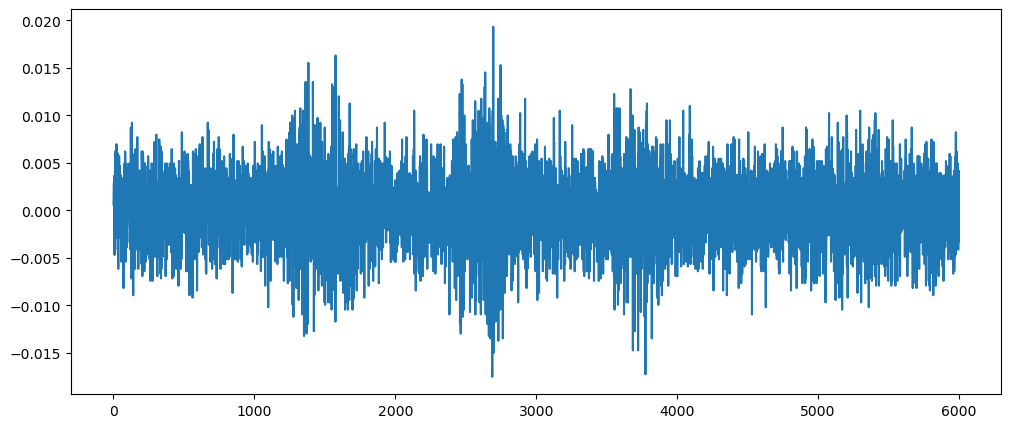

In [7]:
# remove the offset from the data
data_array_sw = data_array_sw - np.mean(data_array_sw, axis=1, keepdims=True)

# plot the first record
plt.figure(figsize=(12, 5))
plt.plot(data_array_sw[0, :])
plt.show()

# LOAD GENERATED DATA FOR PROCESSING

In [8]:
# Load the data
AVPath = '../DATA/GEN_RES/RESPONSE_AV.npy'
EQPath = '../DATA/GEN_RES/RESPONSE_EQ.npy'
IPPath = '../DATA/GEN_RES/RESPONSE_IP.npy'
SWPath = '../DATA/GEN_RES/RESPONSE_SW.npy'

RESPONSE_AV = np.load(AVPath)
RESPONSE_EQ = np.load(EQPath)
RESPONSE_IP = np.load(IPPath)
RESPONSE_SW = np.load(SWPath)

# Dynamically calculate the reshaped dimensions
new_len = RESPONSE_AV.shape[0] * RESPONSE_AV.shape[1]
num_features = RESPONSE_AV.shape[2]

# Reshape the data using the dynamic dimensions
RESPONSE_AV = RESPONSE_AV.reshape(new_len, num_features)
RESPONSE_EQ = RESPONSE_EQ.reshape(new_len, num_features)
RESPONSE_IP = RESPONSE_IP.reshape(new_len, num_features)
RESPONSE_SW = RESPONSE_SW.reshape(new_len, num_features)

# Shuffle the data along the first dimension
np.random.shuffle(RESPONSE_AV)
np.random.shuffle(RESPONSE_EQ)
np.random.shuffle(RESPONSE_IP)
np.random.shuffle(RESPONSE_SW)

# Check the reshaped and shuffled data
print('RESPONSE_AV Shape after reshaping and shuffling:', RESPONSE_AV.shape)
print('RESPONSE_EQ Shape after reshaping and shuffling:', RESPONSE_EQ.shape)
print('RESPONSE_IP Shape after reshaping and shuffling:', RESPONSE_IP.shape)
print('RESPONSE_SW Shape after reshaping and shuffling:', RESPONSE_SW.shape)


RESPONSE_AV Shape after reshaping and shuffling: (1000, 6000)
RESPONSE_EQ Shape after reshaping and shuffling: (1000, 6000)
RESPONSE_IP Shape after reshaping and shuffling: (1000, 6000)
RESPONSE_SW Shape after reshaping and shuffling: (1000, 6000)


In [9]:
import numpy as np

# Discard the last point from each data array (shape becomes 300x6000, 100x6000, etc.)
data_array_av = data_array_av[:, :-1]
data_array_ip = data_array_ip[:, :-1]
data_array_sw = data_array_sw[:, :-1]

# Randomly select 50 indices for replacement in RESPONSE_AV, RESPONSE_IP, RESPONSE_SW
replace_indices_av = np.random.choice(RESPONSE_AV.shape[0], 50, replace=False)
replace_indices_ip = np.random.choice(RESPONSE_IP.shape[0], 50, replace=False)
replace_indices_sw = np.random.choice(RESPONSE_SW.shape[0], 50, replace=False)

# Randomly select 50 samples from data_array_av, data_array_ip, data_array_sw for replacement
random_indices_av = np.random.choice(data_array_av.shape[0], 50, replace=False)
random_indices_ip = np.random.choice(data_array_ip.shape[0], 50, replace=False)
random_indices_sw = np.random.choice(data_array_sw.shape[0], 50, replace=False)

random_samples_av = data_array_av[random_indices_av]
random_samples_ip = data_array_ip[random_indices_ip]
random_samples_sw = data_array_sw[random_indices_sw]

# Replace 50 random samples in RESPONSE_AV, RESPONSE_IP, RESPONSE_SW
RESPONSE_AV[replace_indices_av] = random_samples_av
RESPONSE_IP[replace_indices_ip] = random_samples_ip
RESPONSE_SW[replace_indices_sw] = random_samples_sw

# Remaining data for validation (exclude the used random samples from data_array_av, data_array_ip, data_array_sw)
VAL_DATA_AV = np.delete(data_array_av, random_indices_av, axis=0)
VAL_DATA_IP = np.delete(data_array_ip, random_indices_ip, axis=0)
VAL_DATA_SW = np.delete(data_array_sw, random_indices_sw, axis=0)

# Check shapes
print('RESPONSE_AV shape after replacement:', RESPONSE_AV.shape)
print('VAL_DATA_AV shape:', VAL_DATA_AV.shape)
print('RESPONSE_IP shape after replacement:', RESPONSE_IP.shape)
print('VAL_DATA_IP shape:', VAL_DATA_IP.shape)
print('RESPONSE_SW shape after replacement:', RESPONSE_SW.shape)
print('VAL_DATA_SW shape:', VAL_DATA_SW.shape)


RESPONSE_AV shape after replacement: (1000, 6000)
VAL_DATA_AV shape: (250, 6000)
RESPONSE_IP shape after replacement: (1000, 6000)
VAL_DATA_IP shape: (50, 6000)
RESPONSE_SW shape after replacement: (1000, 6000)
VAL_DATA_SW shape: (50, 6000)


In [10]:
import numpy as np

# Randomly select 50 indices from RESPONSE_EQ
random_indices_eq = np.random.choice(RESPONSE_EQ.shape[0], 50, replace=False)

# Create VAL_DATA_EQ by selecting the random samples from RESPONSE_EQ
VAL_DATA_EQ = RESPONSE_EQ[random_indices_eq]

# Check the size of VAL_DATA_EQ
print('VAL_DATA_EQ shape:', VAL_DATA_EQ.shape)


VAL_DATA_EQ shape: (50, 6000)


# for onboard optimization

In [11]:
import numpy as np
import os

# Directory to save the validation data
save_dir = r'../DATA/VAL_RES'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save each array as a .npy file
np.save(os.path.join(save_dir, 'VAL_DATA_AV.npy'), VAL_DATA_AV)
np.save(os.path.join(save_dir, 'VAL_DATA_EQ.npy'), VAL_DATA_EQ)
np.save(os.path.join(save_dir, 'VAL_DATA_IP.npy'), VAL_DATA_IP)
np.save(os.path.join(save_dir, 'VAL_DATA_SW.npy'), VAL_DATA_SW)

print("Validation data saved successfully.")


Validation data saved successfully.


# for pre-optimization

In [12]:
# Directory to save the response data
save_dir_syn = r'../DATA/SYN_RES'

# Ensure the directory exists
os.makedirs(save_dir_syn, exist_ok=True)

# Save each array as a .npy file
np.save(os.path.join(save_dir_syn, 'RESPONSE_AV.npy'), RESPONSE_AV)
np.save(os.path.join(save_dir_syn, 'RESPONSE_EQ.npy'), RESPONSE_EQ)
np.save(os.path.join(save_dir_syn, 'RESPONSE_IP.npy'), RESPONSE_IP)
np.save(os.path.join(save_dir_syn, 'RESPONSE_SW.npy'), RESPONSE_SW)

print("Response data saved successfully.")


Response data saved successfully.


In [13]:
# print size of each dataset
print('RESPONSE_AV shape:', RESPONSE_AV.shape)
print('RESPONSE_EQ shape:', RESPONSE_EQ.shape)
print('RESPONSE_IP shape:', RESPONSE_IP.shape)
print('RESPONSE_SW shape:', RESPONSE_SW.shape)

RESPONSE_AV shape: (1000, 6000)
RESPONSE_EQ shape: (1000, 6000)
RESPONSE_IP shape: (1000, 6000)
RESPONSE_SW shape: (1000, 6000)


In [14]:
# print size of each dataset for validation
print('VAL_DATA_AV shape:', VAL_DATA_AV.shape)
print('VAL_DATA_EQ shape:', VAL_DATA_EQ.shape)
print('VAL_DATA_IP shape:', VAL_DATA_IP.shape)
print('VAL_DATA_SW shape:', VAL_DATA_SW.shape)

VAL_DATA_AV shape: (250, 6000)
VAL_DATA_EQ shape: (50, 6000)
VAL_DATA_IP shape: (50, 6000)
VAL_DATA_SW shape: (50, 6000)
